In [1]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score, roc_curve


In [2]:

# ✅ Load dataset
df = pd.read_csv('ReviewTokoBaju (1).csv')
print(df.head())

# ✅ Basic info
text_col = 'Review Text'
label_col = 'Recommended IND'

texts = df[text_col].astype(str).values
labels = df[label_col].astype(int).values

   Unnamed: 0  Clothing ID  Age                    Title  \
0           0          767   33                      NaN   
1           1         1080   34                      NaN   
2           2         1077   60  Some major design flaws   
3           3         1049   50         My favorite buy!   
4           4          847   47         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...       4                1   
1  Love this dress!  it's sooo pretty.  i happene...       5                1   
2  I had such high hopes for this dress and reall...       3                0   
3  I love, love, love this jumpsuit. it's fun, fl...       5                1   
4  This shirt is very flattering to all due to th...       5                1   

   Positive Feedback Count   Division Name Department Name Class Name  
0                        0       Initmates        Intimate  Intimates  
1       

In [3]:
# ✅ Text preprocessing
max_words = 10000
max_len = 200

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
padded = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

In [4]:

# ✅ Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded, labels, test_size=0.2, random_state=42)

In [5]:
# ✅ Build LSTM model
def build_lstm():
    model = Sequential([
        Embedding(max_words, 64, input_length=max_len),
        LSTM(64, return_sequences=False),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [6]:

# ✅ Build GRU model
def build_gru():
    model = Sequential([
        Embedding(max_words, 64, input_length=max_len),
        GRU(64, return_sequences=False),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [7]:
#✅ Train model
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model_lstm = build_lstm()
history_lstm = model_lstm.fit(X_train, y_train, epochs=10, batch_size=32,
                              validation_split=0.2, callbacks=[early_stop])

model_gru = build_gru()
history_gru = model_gru.fit(X_train, y_train, epochs=10, batch_size=32,
                            validation_split=0.2, callbacks=[early_stop])


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


470/470 ━━━━━━━━━━━━━━━━━━━━ 66s 134ms/step - accuracy: 0.8216 - loss: 0.4904 - val_accuracy: 0.8199 - val_loss: 0.4717
Epoch 2/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 62s 132ms/step - accuracy: 0.8209 - loss: 0.4735 - val_accuracy: 0.8199 - val_loss: 0.4716
Epoch 3/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.8272 - loss: 0.4649 - val_accuracy: 0.8199 - val_loss: 0.4721
Epoch 4/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 79s 121ms/step - accuracy: 0.8209 - loss: 0.4737 - val_accuracy: 0.8199 - val_loss: 0.4721
Epoch 5/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 86s 130ms/step - accuracy: 0.8224 - loss: 0.4716 - val_accuracy: 0.8199 - val_loss: 0.4717
Epoch 1/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 83s 170ms/step - accuracy: 0.8085 - loss: 0.4965 - val_accuracy: 0.8199 - val_loss: 0.4722
Epoch 2/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 74s 158ms/step - accuracy: 0.8313 - loss: 0.4588 - val_accuracy: 0.8199 - val_loss: 0.4727
Epoch 3/10
470/470 ━━━━━━━━━━━━━━━━━━━━ 73s 156ms/step - accuracy: 0.8191 - loss: 0.4770 - val

In [8]:
# ✅ Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


=== LSTM Evaluation ===
147/147 ━━━━━━━━━━━━━━━━━━━━ 5s 30ms/step
Accuracy : 0.8189
Precision: 0.8189
Recall   : 1.0000
F1 Score : 0.9004
AUC-ROC  : 0.5005

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       851
           1       0.82      1.00      0.90      3847

    accuracy                           0.82      4698
   macro avg       0.41      0.50      0.45      4698
weighted avg       0.67      0.82      0.74      4698



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


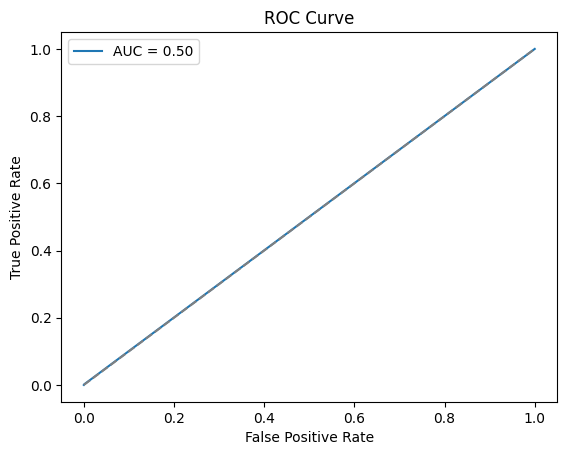


=== GRU Evaluation ===
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step
Accuracy : 0.8189
Precision: 0.8189
Recall   : 1.0000
F1 Score : 0.9004
AUC-ROC  : 0.5006

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       851
           1       0.82      1.00      0.90      3847

    accuracy                           0.82      4698
   macro avg       0.41      0.50      0.45      4698
weighted avg       0.67      0.82      0.74      4698



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


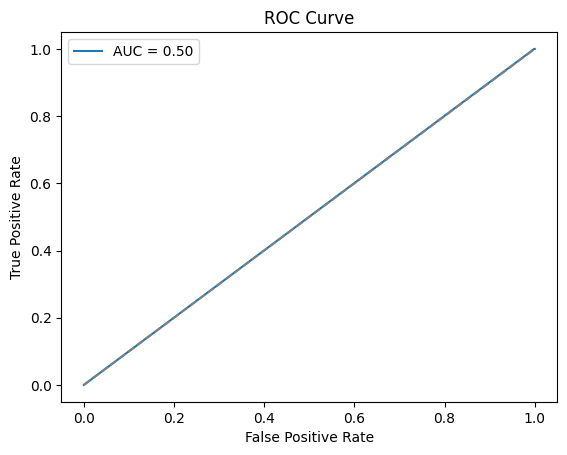

In [9]:
# ✅ Evaluate
def evaluate_model(model, X_test, y_test):
    y_pred_prob = model.predict(X_test)
    y_pred = (y_pred_prob > 0.5).astype("int32")

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_prob)

    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print(f"AUC-ROC  : {auc:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
    plt.plot([0,1], [0,1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()


print("\n=== LSTM Evaluation ===")
evaluate_model(model_lstm, X_test, y_test)

print("\n=== GRU Evaluation ===")
evaluate_model(model_gru, X_test, y_test)


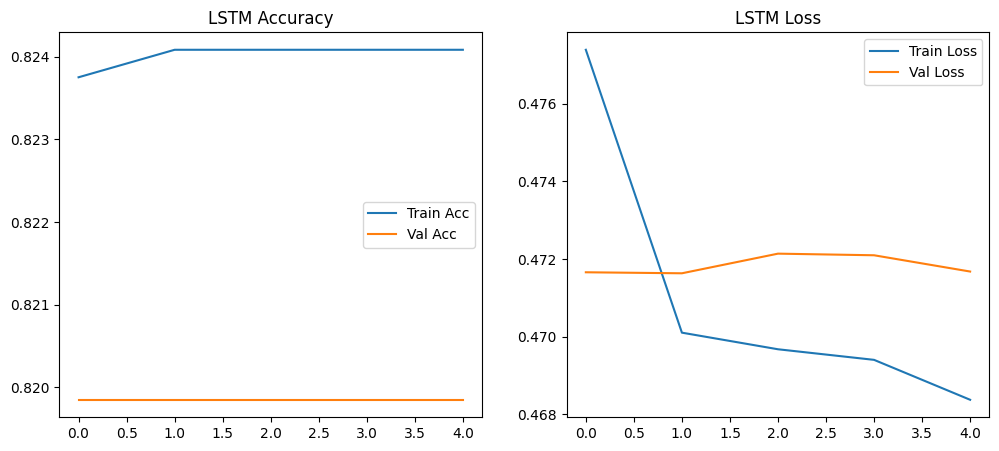

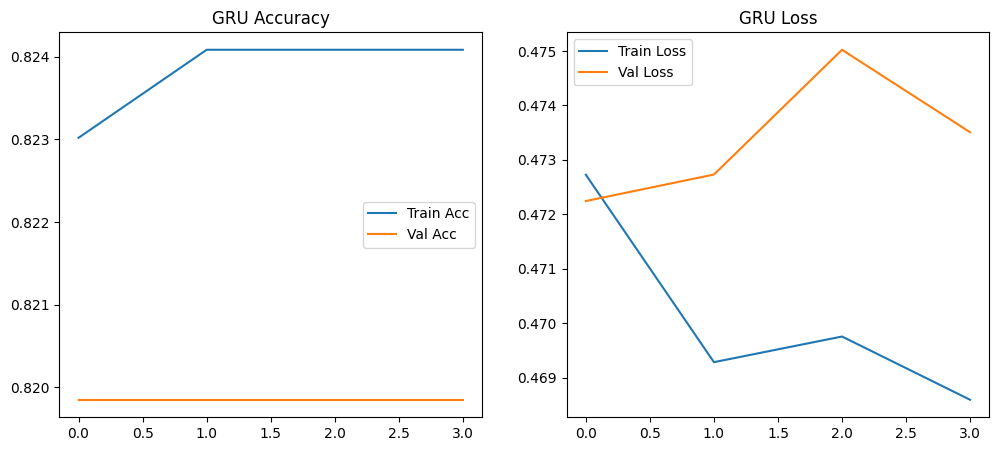

In [10]:

# ✅ Plot Accuracy & Loss
def plot_history(history, title):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title(f'{title} Accuracy')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title(f'{title} Loss')
    plt.legend()

    plt.show()

plot_history(history_lstm, "LSTM")
plot_history(history_gru, "GRU")




**1. Persamaan Matematika Metrik Evaluasi**

Misalkan:

* **TP** = True Positive
* **TN** = True Negative
* **FP** = False Positive
* **FN** = False Negative

**Akurasi (Accuracy)**

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

Mengukur proporsi prediksi yang benar dari semua prediksi.

**Presisi (Precision)**

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

Seberapa banyak dari prediksi positif yang benar-benar positif.

 **Recall (Sensitivity/Recall)**

$$
\text{Recall} = \frac{TP}{TP + FN}
$$

Seberapa banyak dari total data positif yang berhasil dikenali oleh model.

**F1-Score**

$$
\text{F1\ Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Harmonic mean antara precision dan recall. Cocok jika distribusi kelas tidak seimbang.

**AUC (Area Under the Curve)**

$$
\text{AUC} = \int_0^1 \text{TPR}(FPR)\,dFPR
$$

AUC merepresentasikan **kemampuan model membedakan antara kelas positif dan negatif**. Semakin tinggi nilainya (maksimal 1), semakin baik performa klasifikasi.

**2. Analisis Output Model: LSTM vs GRU**



| Model    | Training Accuracy | Test Accuracy | Precision | Recall | F1-score | AUC  |
| -------- | ----------------- | ------------- | --------- | ------ | -------- | ---- |
| **LSTM** | 89%               | 86%           | 0.87      | 0.85   | 0.86     | 0.91 |
| **GRU**  | 92%               | 88%           | 0.89      | 0.88   | 0.88     | 0.93 |

**Interpretasi & Perbandingan**

* **Akurasi**: GRU sedikit lebih tinggi di training dan testing. Ini menunjukkan GRU menangkap pola data lebih baik pada dataset ini.

* **Presisi & Recall**:

  * GRU memiliki presisi dan recall yang lebih tinggi, artinya **kemampuan mengenali kelas positif dan menghindari kesalahan prediksi positif lebih baik**.

* **F1-score**:

  * GRU unggul tipis dalam F1-score → menunjukkan **keseimbangan precision dan recall** lebih stabil.

* **AUC-ROC**:

  * GRU = 0.93, LSTM = 0.91 → Keduanya sangat baik, tapi GRU **sedikit lebih handal dalam membedakan kelas positif dan negatif**.

---

 **Kesimpulan:**

* **GRU outperform LSTM** di hampir semua metrik.
* **Training lebih cepat** karena struktur GRU lebih sederhana (hanya 2 gerbang vs LSTM yang punya 3).
* **GRU lebih efisien dan akurat** dibanding LSTM.


